In [2]:
import pandas as pd
import numpy as np
import os
raw_data_path= os.path.join(os.path.pardir,'data','raw')
train_file_path = os.path.join(raw_data_path,'train.csv')
test_file_path = os.path.join(raw_data_path,'test.csv')
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')
test_df['Survived']=-888
df = pd.concat((train_df,test_df),sort=False,axis=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


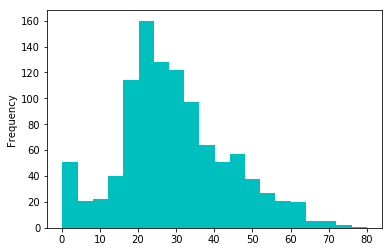

In [5]:
df.Age.plot(kind='hist',bins=20,color='c')

In [6]:
df.loc[df.Age > 70]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
988,-888,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [7]:
df.loc[df.Fare == df.Fare.max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
1235,-888,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


In [10]:
logFare = np.log(df.Fare+1)

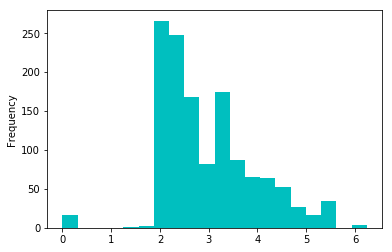

In [11]:
logFare.plot(kind='hist',color='c',bins=20)

In [17]:
df['Fare_Bin']=pd.qcut(df.Fare,4,labels=['very_low','low','high','very_high'])

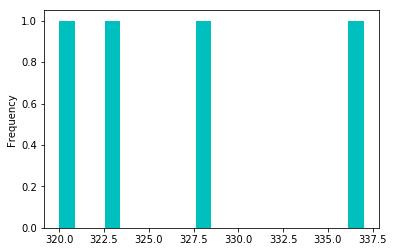

In [18]:
pd.qcut(df.Fare,4,labels=['very_low','low','high','very_high']).value_counts().plot(kind='hist',bins=20,color='c')

In [19]:
df['AgeState']=np.where(df['Age']>=18,'Adult','Child')

In [20]:
df['AgeState'].value_counts()

Adult    892
Child    417
Name: AgeState, dtype: int64

In [23]:
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].AgeState)

AgeState,Adult,Child
Survived,,
0,372,177
1,229,113


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 13 columns):
Survived    1309 non-null int64
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare_Bin    1308 non-null category
AgeState    1309 non-null object
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 134.4+ KB


In [25]:
df['FamilySize']= df.Parch + df.SibSp + 1

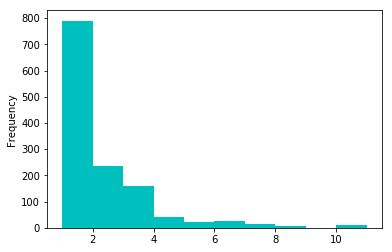

In [26]:
df['FamilySize'].plot(kind='hist',color='c')

In [27]:
df.loc[df.FamilySize == df.FamilySize.max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Bin,AgeState,FamilySize
PassengerId,,,,,,,,,,,,,,
160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,very_high,Child,11
181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,very_high,Child,11
202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,very_high,Child,11
325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,very_high,Child,11
793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,very_high,Child,11
847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,very_high,Child,11
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,very_high,Child,11
1080,-888,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,very_high,Child,11
1234,-888,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,very_high,Child,11


In [28]:
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 14 columns):
Survived      1309 non-null int64
Pclass        1309 non-null int64
Name          1309 non-null object
Sex           1309 non-null object
Age           1046 non-null float64
SibSp         1309 non-null int64
Parch         1309 non-null int64
Ticket        1309 non-null object
Fare          1308 non-null float64
Cabin         295 non-null object
Embarked      1307 non-null object
Fare_Bin      1308 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
dtypes: category(1), float64(2), int64(5), object(6)
memory usage: 144.6+ KB


In [31]:
df['IsMother']= np.where(((df.Sex== 'female') & (df.Parch > 0) & (df.Age > 18)),1,0)

In [32]:
pd.crosstab(df[df.Survived!=-888].Survived, df[df.Survived!=-888].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,294,48


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 15 columns):
Survived      1309 non-null int64
Pclass        1309 non-null int64
Name          1309 non-null object
Sex           1309 non-null object
Age           1046 non-null float64
SibSp         1309 non-null int64
Parch         1309 non-null int64
Ticket        1309 non-null object
Fare          1308 non-null float64
Cabin         295 non-null object
Embarked      1307 non-null object
Fare_Bin      1308 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int32
dtypes: category(1), float64(2), int32(1), int64(5), object(6)
memory usage: 149.8+ KB


In [35]:
df.Cabin

PassengerId
1               NaN
2               C85
3               NaN
4              C123
5               NaN
6               NaN
7               E46
8               NaN
9               NaN
10              NaN
11               G6
12             C103
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19              NaN
20              NaN
21              NaN
22              D56
23              NaN
24               A6
25              NaN
26              NaN
27              NaN
28      C23 C25 C27
29              NaN
30              NaN
           ...     
1280            NaN
1281            NaN
1282            B24
1283            D28
1284            NaN
1285            NaN
1286            NaN
1287            C31
1288            NaN
1289            B41
1290            NaN
1291            NaN
1292             C7
1293            NaN
1294            NaN
1295            NaN
1296            D40
1297            D38
1298    

In [36]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [37]:
df.loc[df.Cabin == 'T']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,
340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,very_high,Adult,1,0


In [38]:
df.loc[df.Cabin == 'T','Cabin'] = np.NaN

In [39]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [40]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
df['Deck']=df['Cabin'].map(lambda x: get_deck(x))

In [42]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [43]:
pd.crosstab(df[df.Survived!=-888].Survived, df[df.Survived!=-888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 16 columns):
Survived      1309 non-null int64
Pclass        1309 non-null int64
Name          1309 non-null object
Sex           1309 non-null object
Age           1046 non-null float64
SibSp         1309 non-null int64
Parch         1309 non-null int64
Ticket        1309 non-null object
Fare          1308 non-null float64
Cabin         294 non-null object
Embarked      1307 non-null object
Fare_Bin      1308 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int32
Deck          1309 non-null object
dtypes: category(1), float64(2), int32(1), int64(5), object(7)
memory usage: 160.0+ KB


In [45]:
df['IsMale'] = np.where(df.Sex== 'Male',1,0)

In [47]:
df = pd.get_dummies(df,columns=['Deck','Pclass','Fare_Bin','Embarked','AgeState'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 32 columns):
Survived              1309 non-null int64
Name                  1309 non-null object
Sex                   1309 non-null object
Age                   1046 non-null float64
SibSp                 1309 non-null int64
Parch                 1309 non-null int64
Ticket                1309 non-null object
Fare                  1308 non-null float64
Cabin                 294 non-null object
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcla

In [50]:
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'],axis=1, inplace =True)

In [51]:
columns = [column for column in df.columns if column!='Survived']
columns = ['Survived'] + columns
df=df[columns]

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 26 columns):
Survived              1309 non-null int64
Age                   1046 non-null float64
Fare                  1308 non-null float64
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Fare_Bin_very_low     1309 non-null uint8
Fare_Bin_low          1309 non-null uint8
Fare_Bin_high         1309 non-null uint8
Fare_Bin_very_high    1309 non-null uint8
Embarke

In [53]:
processed_data_path = os.path.join(os.path.pardir,'data','processed')
write_train_path = os.path.join(processed_data_path,'train.csv')
write_test_path = os.path.join(processed_data_path,'test.csv')


In [54]:
df.loc[df.Survived!=-888].to_csv(write_train_path)

In [55]:
columns = [column for column in df.columns if column!='Survived']
df.loc[df.Survived!=-888,columns].to_csv(write_test_path)

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

ValueError: max must be larger than min in range parameter.

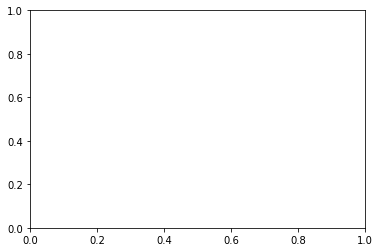

In [57]:
plt.hist(df.Age)